In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pylab as plt
%matplotlib inline
from pandas import read_csv
from pandas import datetime
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

In [6]:
data_hotel_reviews = pd.read_csv("Hotel_Reviews.csv")

In [7]:
data_hotel_reviews.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [103]:
for i in data_hotel_reviews.columns:
    print(i)

Hotel_Address
Additional_Number_of_Scoring
Review_Date
Average_Score
Hotel_Name
Reviewer_Nationality
Negative_Review
Review_Total_Negative_Word_Counts
Total_Number_of_Reviews
Positive_Review
Review_Total_Positive_Word_Counts
Total_Number_of_Reviews_Reviewer_Has_Given
Reviewer_Score
Tags
days_since_review
lat
lng


In [104]:
len(data_hotel_reviews.Hotel_Name.unique())

1492

In [6]:
data_hotel_reviews.Reviewer_Nationality.describe()

count               515738
unique                 227
top        United Kingdom 
freq                245246
Name: Reviewer_Nationality, dtype: object

In [7]:
Reviewer_Nat_Count = data_hotel_reviews.Reviewer_Nationality.value_counts()
print(Reviewer_Nat_Count[:10])

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
 Saudi Arabia                   8951
 Netherlands                    8772
 Switzerland                    8678
 Germany                        7941
 Canada                         7894
Name: Reviewer_Nationality, dtype: int64


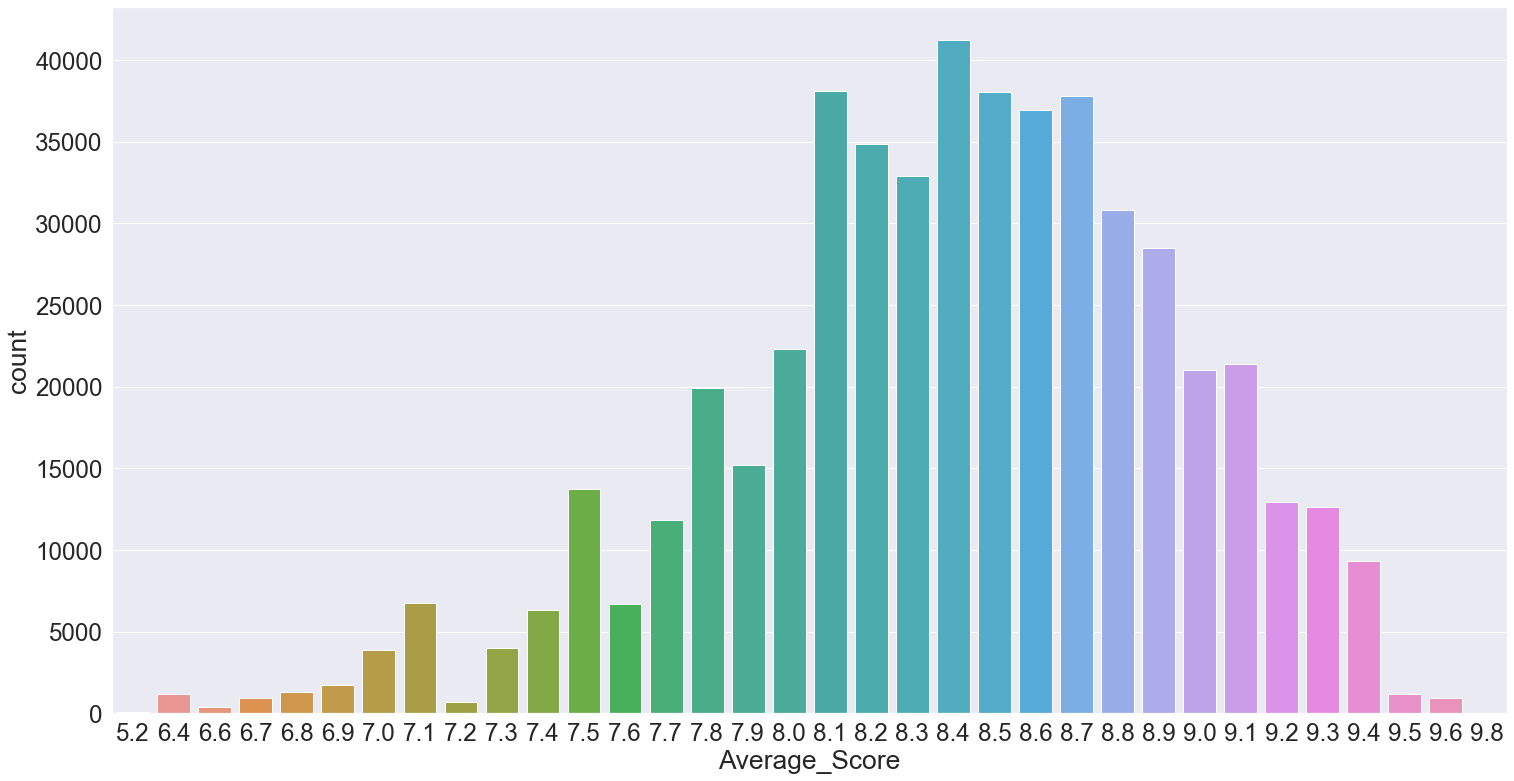

In [65]:
data_hotel_reviews_plot = data_hotel_reviews[["Hotel_Name","Average_Score"]]

sns.set(font_scale = 2.2)
a4_dims = (25,13)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax = ax,x = "Average_Score",data=data_hotel_reviews)

In [8]:
text = ""
for i in range(data_hotel_reviews.shape[0]):
    text = " ".join([text,data_hotel_reviews["Reviewer_Nationality"].values[i]])

KeyboardInterrupt: 

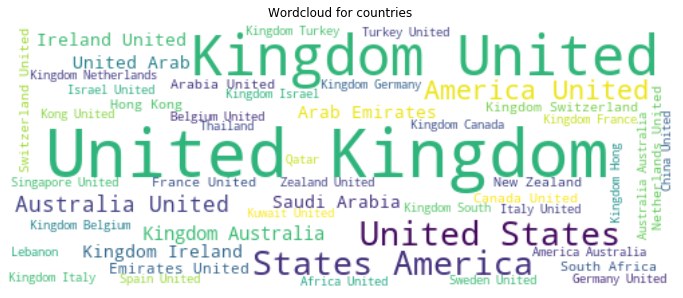

In [11]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width = 500,\
                      height=200, max_font_size=50, max_words=50).generate(text)
wordcloud.recolor(random_state=312)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title("Wordcloud for countries ")
plt.axis("off")
plt.show()

In [12]:
data_hotel_reviews.Review_Date.describe()

count       515738
unique         731
top       8/2/2017
freq          2585
Name: Review_Date, dtype: object

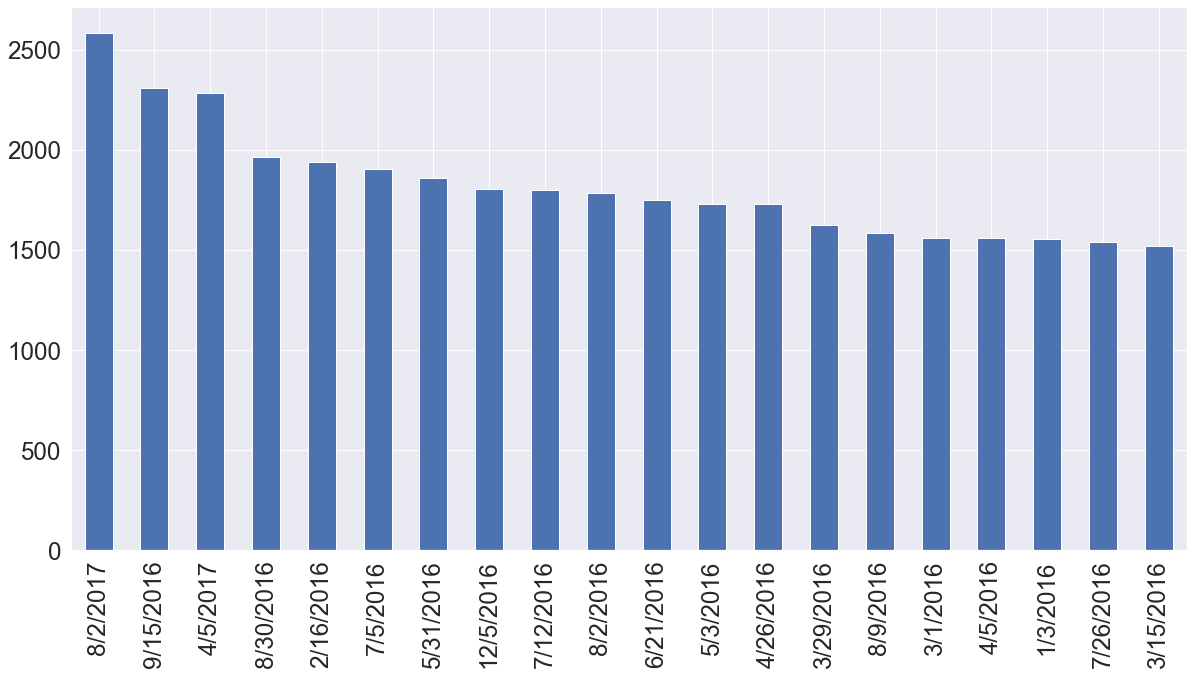

In [66]:
Review_Date_count = data_hotel_reviews.Review_Date.value_counts()
plt.figure(figsize=(20,10))
Review_Date_count[:20].plot(kind='bar')

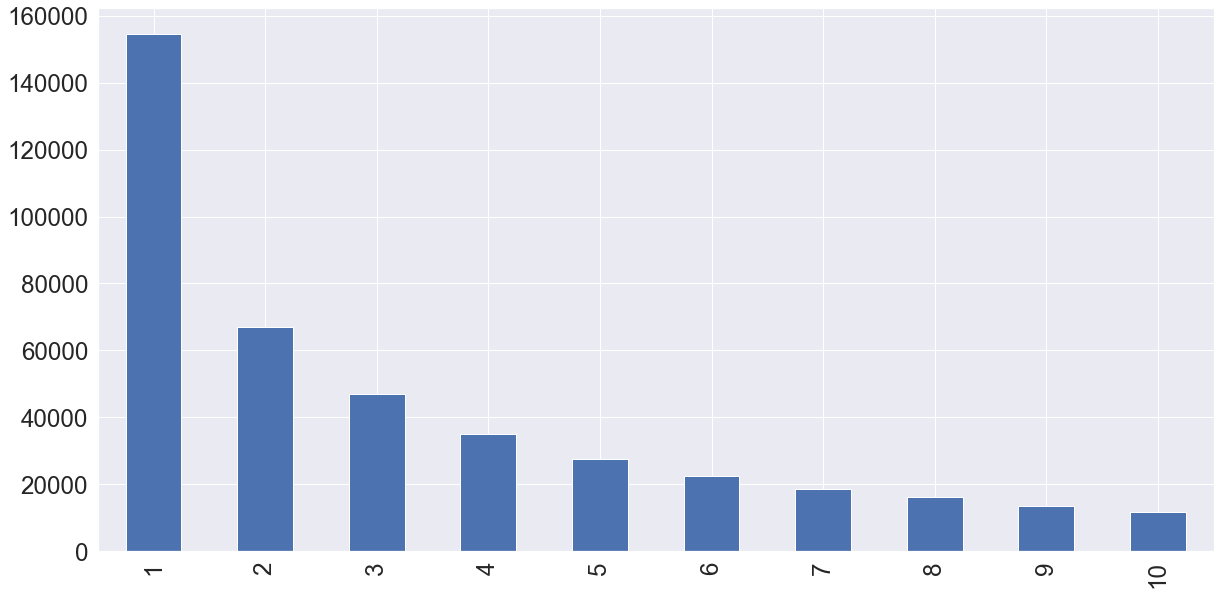

In [67]:
Reviewers_freq = data_hotel_reviews.Total_Number_of_Reviews_Reviewer_Has_Given.value_counts()
plt.figure(figsize=(20,10))
Reviewers_freq[0:10].plot(kind='bar',title='')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [68]:
min_rating = data_hotel_reviews.Average_Score.min() 
max_rating = data_hotel_reviews.Average_Score.max()
mean_rating=data_hotel_reviews.Average_Score.mean()
print('The hotel ratings are between '+ str(min_rating) +" "+'and'+" "+str(max_rating)+" "+'with a mean of'+" "+
      str(round(mean_rating,2)))

The hotel ratings are between 5.2 and 9.8 with a mean of 8.4


In [69]:
data_hotel_reviews['Average_Score'].corr(data_hotel_reviews['Reviewer_Score'])

0.36435082685489584

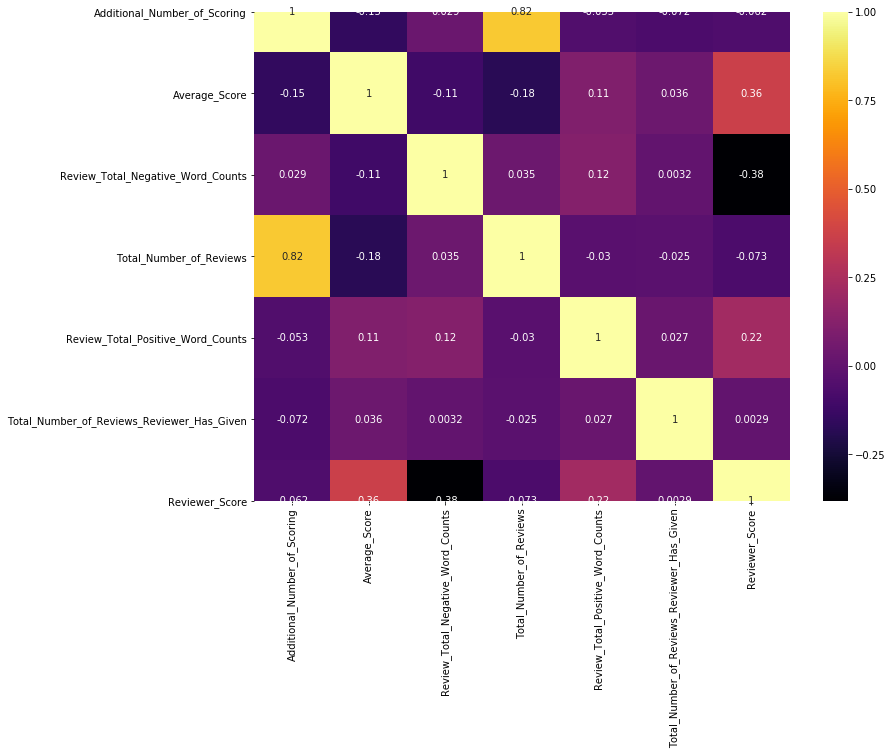

In [56]:
correlation=data_hotel_reviews[['Additional_Number_of_Scoring','Average_Score','Review_Total_Negative_Word_Counts','Total_Number_of_Reviews','Review_Total_Positive_Word_Counts','Total_Number_of_Reviews_Reviewer_Has_Given','Reviewer_Score']]
corr_reviews=correlation.corr()
f,ax = plt.subplots(figsize=(12,9))
#Draw the heatmap using seaborn
sns.heatmap(corr_reviews, cmap='inferno', annot=True)


In [128]:
review_data_hotel_reviews = data_hotel_reviews[['Hotel_Name', 'Positive_Review', 'Negative_Review', 'Average_Score', 'Reviewer_Score']].copy()
review_data_hotel_reviews.head()

,Hotel_Name,Positive_Review,Negative_Review,Average_Score,Reviewer_Score
0,Hotel Arena,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,7.7,2.9
1,Hotel Arena,No real complaints the hotel was great great ...,No Negative,7.7,7.5
2,Hotel Arena,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,7.7,7.1
3,Hotel Arena,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,7.7,3.8
4,Hotel Arena,Amazing location and building Romantic setting,You When I booked with your company on line y...,7.7,6.7


In [129]:
review_data_hotel_reviews['review_text'] = review_data_hotel_reviews['Positive_Review'].astype(str) + review_data_hotel_reviews['Negative_Review'].astype(str)

In [107]:
for i in review_data_hotel_reviews.columns:
    print(i)

Hotel_Name
Positive_Review
Negative_Review
Average_Score
Reviewer_Score
review_text


In [108]:
review_data_hotel_reviews.head()

,Hotel_Name,Positive_Review,Negative_Review,Average_Score,Reviewer_Score,review_text
0,Hotel Arena,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,7.7,2.9,Only the park outside of the hotel was beauti...
1,Hotel Arena,No real complaints the hotel was great great ...,No Negative,7.7,7.5,No real complaints the hotel was great great ...
2,Hotel Arena,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,7.7,7.1,Location was good and staff were ok It is cut...
3,Hotel Arena,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,7.7,3.8,Great location in nice surroundings the bar a...
4,Hotel Arena,Amazing location and building Romantic setting,You When I booked with your company on line y...,7.7,6.7,Amazing location and building Romantic settin...


In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

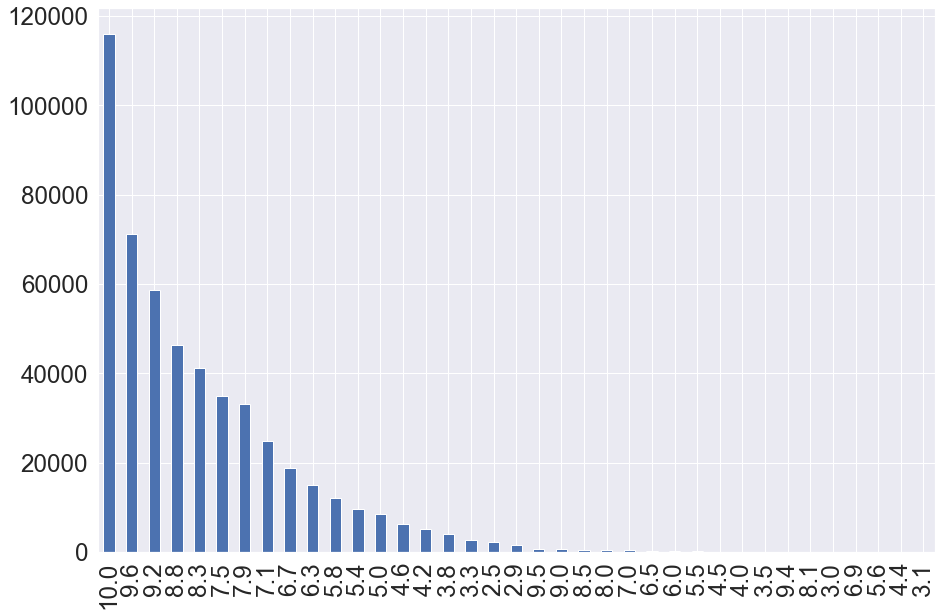

In [76]:
review_data_hotel_reviews['review_text'] = review_data_hotel_reviews['review_text'].fillna('')
review_data_hotel_reviews.Reviewer_Score.value_counts()
review_data_hotel_reviews.Reviewer_Score.value_counts().plot(kind='bar',figsize=(15,10))

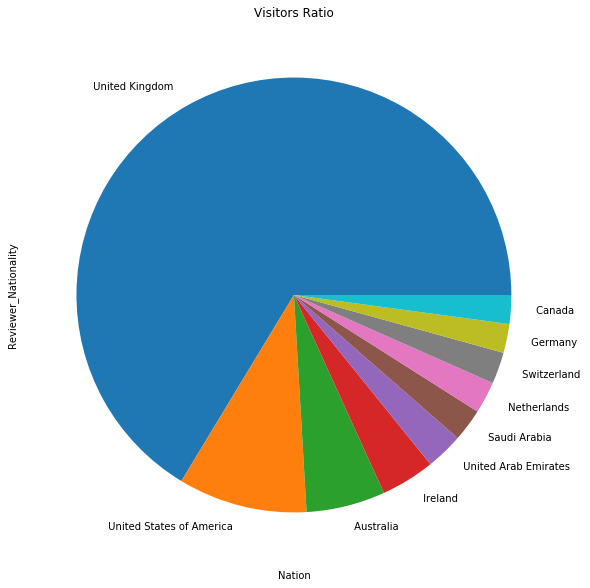

In [12]:
Length = len(data.Reviewer_Nationality)
result=(data.Reviewer_Nationality.value_counts()*100/Length).sort_values(ascending=False)
result
plt.xlabel('Nation')
plt.ylabel('Percentage of people visiting')
plt.title('Visitors Ratio')
result.head(10).plot(kind='pie',figsize=(20,10))
plt.show()

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize

def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [131]:
stop_words=set(stopwords.words("english"))
review_data_hotel_reviews['review_text'] = review_data_hotel_reviews['review_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
review_data_hotel_reviews['review_text'].head()

0    Only park outside hotel beautiful I angry made...
1    No real complaints hotel great great location ...
2    Location good staff ok It cute hotel breakfast...
3    Great location nice surroundings bar restauran...
4    Amazing location building Romantic setting You...
Name: review_text, dtype: object

In [130]:
#removing english stop words
review_data_hotel_reviews['STOPWORDS'] = review_data_hotel_reviews['review_text'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
print(review_data_hotel_reviews[['review_text','STOPWORDS']].head())
#removing digits
review_data_hotel_reviews['NUMERICS'] = review_data_hotel_reviews['review_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
print(review_data_hotel_reviews[['review_text','NUMERICS']].head())
#removing hashtags
review_data_hotel_reviews['HASHTAGS'] = review_data_hotel_reviews['review_text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
print(review_data_hotel_reviews[['review_text','HASHTAGS']].head())

                                         review_text  STOPWORDS
0   Only the park outside of the hotel was beauti...        201
1   No real complaints the hotel was great great ...         39
2   Location was good and staff were ok It is cut...         23
3   Great location in nice surroundings the bar a...        102
4   Amazing location and building Romantic settin...         70
                                         review_text  NUMERICS
0   Only the park outside of the hotel was beauti...        11
1   No real complaints the hotel was great great ...         0
2   Location was good and staff were ok It is cut...         0
3   Great location in nice surroundings the bar a...         0
4   Amazing location and building Romantic settin...         0
                                         review_text  HASHTAGS
0   Only the park outside of the hotel was beauti...         0
1   No real complaints the hotel was great great ...         0
2   Location was good and staff were ok It is cut

In [132]:
#removing punctuation
review_data_hotel_reviews['review_text'] = review_data_hotel_reviews['review_text'].str.replace('[^\w\s]','')
#trasnforming to lower case
review_data_hotel_reviews['review_text'] = review_data_hotel_reviews['review_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [83]:
review_data_hotel_reviews

,Hotel_Name,Positive_Review,Negative_Review,Average_Score,Reviewer_Score,review_text,STOPWORDS,NUMERICS,HASHTAGS
0,Hotel Arena,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,7.7,2.9,only park outside hotel beautiful i angry made...,0,11,0
1,Hotel Arena,No real complaints the hotel was great great ...,No Negative,7.7,7.5,no real complaints hotel great great location ...,0,0,0
2,Hotel Arena,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,7.7,7.1,location good staff ok it cute hotel breakfast...,0,0,0
3,Hotel Arena,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,7.7,3.8,great location nice surroundings bar restauran...,0,0,0
4,Hotel Arena,Amazing location and building Romantic setting,You When I booked with your company on line y...,7.7,6.7,amazing location building romantic setting you...,0,0,0
...,...,...,...,...,...,...,...,...,...
515733,Atlantis Hotel Vienna,location,no trolly or staff to help you take the lugga...,8.1,7.0,location trolly staff help take luggage room,0,0,0
515734,Atlantis Hotel Vienna,Breakfast was ok and we got earlier check in,The hotel looks like 3 but surely not 4,8.1,5.8,breakfast ok got earlier check the hotel looks...,0,2,0
515735,Atlantis Hotel Vienna,No Positive,The ac was useless It was a hot week in vienn...,8.1,2.5,no positive the ac useless it hot week vienna ...,0,0,0
515736,Atlantis Hotel Vienna,The rooms are enormous and really comfortable...,No Negative,8.1,8.8,the rooms enormous really comfortable i believ...,0,1,0


In [133]:
#commond words removal
freq = pd.Series(' '.join(review_data_hotel_reviews['review_text']).split()).value_counts()[:10]
freq

room         315312
the          273170
staff        230017
location     199233
hotel        198489
i            169055
breakfast    141248
no           140360
good         132294
negative     129683
dtype: int64

In [134]:
#removing frequent words
freq = list(freq.index)
review_data_hotel_reviews['review_text'] = review_data_hotel_reviews['review_text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
review_data_hotel_reviews['review_text'].head()

0    only park outside beautiful angry made post av...
1    real complaints great great surroundings rooms...
2    ok it cute range nice will go back rooms nice ...
3    great nice surroundings bar restaurant nice lo...
4    amazing building romantic setting you when boo...
Name: review_text, dtype: object

In [99]:
def text_freq(x)
pd.value_counts(x.split(""))

tf1 = (review_data['review_text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']

NameError: name 'review_data' is not defined

In [39]:
TextBlob(review_data['review_text'][0]).words

WordList(['only', 'park', 'outside', 'beautiful', 'angry', 'made', 'post', 'available', 'via', 'possible', 'sites', 'use', 'planting', 'trips', 'one', 'make', 'mistake', 'booking', 'place', 'made', 'booking', 'via', 'booking', 'com', 'we', 'stayed', '6', 'nights', '11', '17', 'july', 'upon', 'arrival', 'placed', 'small', 'and', 'floor', 'it', 'turned', 'booked', 'specially', 'reserved', '2', 'level', 'dulled', 'would', 'big', 'windows', 'high', 'ceilings', 'ok', 'mind', 'broken', 'window', 'closed', 'hello', 'rain', 'mind', 'fridge', 'contained', 'sort', 'big', 'weapon', 'least', 'guessed', 'smell', 'intimately', 'asked', 'change', 'explaining', '2', 'times', 'booked', 'dulled', 'bow', 'costs', 'simple', 'double', 'got', 'way', 'volume', 'due', 'high', 'ceiling', 'offered', 'next', 'day', 'so', 'check', 'next', 'day', '11', 'clock', 'order', 'get', 'waned', 'not', 'best', 'way', 'begin', 'holiday', 'so', 'wait', 'till', '13', '00', 'order', 'check', 'new', 'wonderful', 'waist', 'time',

In [89]:
frequency_text = (review_data_hotel_reviews['review_text'][1:10000]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
frequency_text.columns = ['words','frequency']
frequency_text

,words,frequency
0,great,2118.0
1,upon,87.0
2,bit,583.0
3,minor,38.0
4,confusing,15.0
...,...,...
11236,regulation,1.0
11237,enjoyableno,1.0
11238,exeded,1.0
11239,fii,1.0


In [90]:
from sklearn.model_selection import train_test_split
train,test1 = train_test_split(review_data,test_size=0.8,random_state=42)

print(train.shape);print(test1.shape)

(103147, 5)
(412591, 5)


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
t = TfidfVectorizer(max_features=10000)
x = t.fit_transform(review_data['review_text'].values.astype('U'))  

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [24]:
gbdt = GradientBoostingRegressor(max_depth=5,learning_rate=0.1,n_estimators=150) # Large iteration, fewer estimators
gbdt.fit(x,review_data['review_text'])

ValueError: could not convert string to float: 'only park outside beautiful angry made post available via possible sites use planing trips one make mistake booking place made booking via booking com we stayed 6 nights 11 17 july upon arrival placed small 2nd floor it turned booked specially reserved 2 level duplex would big windows high ceilings ok mind broken window closed hello rain mini fridge contained sort bio weapon least guessed smell intimately asked change explaining 2 times booked duplex btw costs simple double got way volume due high ceiling offered next day so check next day 11 clock order get waned not best way begin holiday so wait till 13 00 order check new wonderful waist time 023 got wanted peaceful internal garden view big window we tired waiting placed belongings rushed city in evening turned constant noise guess made vibrating vent tubes something constant annoying hell and stop even 2 making hard fall asleep wife audio recording attach want send via e mail next day technician came able determine cause disturbing sound offered change fully booked 1 left one smaller seems newer'

In [92]:
review_data_hotel_reviews.isnull().sum()

Hotel_Name         0
Positive_Review    0
Negative_Review    0
Average_Score      0
Reviewer_Score     0
review_text        0
STOPWORDS          0
NUMERICS           0
HASHTAGS           0
dtype: int64

In [91]:
review_data_hotel_reviews=review_data_hotel_reviews.dropna()
review_data_hotel_reviews = review_data_hotel_reviews.reset_index(drop=True)
review_data_hotel_reviews

,Hotel_Name,Positive_Review,Negative_Review,Average_Score,Reviewer_Score,review_text,STOPWORDS,NUMERICS,HASHTAGS
0,Hotel Arena,Only the park outside of the hotel was beauti...,I am so angry that i made this post available...,7.7,2.9,only park outside hotel beautiful i angry made...,0,11,0
1,Hotel Arena,No real complaints the hotel was great great ...,No Negative,7.7,7.5,no real complaints hotel great great location ...,0,0,0
2,Hotel Arena,Location was good and staff were ok It is cut...,Rooms are nice but for elderly a bit difficul...,7.7,7.1,location good staff ok it cute hotel breakfast...,0,0,0
3,Hotel Arena,Great location in nice surroundings the bar a...,My room was dirty and I was afraid to walk ba...,7.7,3.8,great location nice surroundings bar restauran...,0,0,0
4,Hotel Arena,Amazing location and building Romantic setting,You When I booked with your company on line y...,7.7,6.7,amazing location building romantic setting you...,0,0,0
...,...,...,...,...,...,...,...,...,...
515733,Atlantis Hotel Vienna,location,no trolly or staff to help you take the lugga...,8.1,7.0,location trolly staff help take luggage room,0,0,0
515734,Atlantis Hotel Vienna,Breakfast was ok and we got earlier check in,The hotel looks like 3 but surely not 4,8.1,5.8,breakfast ok got earlier check the hotel looks...,0,2,0
515735,Atlantis Hotel Vienna,No Positive,The ac was useless It was a hot week in vienn...,8.1,2.5,no positive the ac useless it hot week vienna ...,0,0,0
515736,Atlantis Hotel Vienna,The rooms are enormous and really comfortable...,No Negative,8.1,8.8,the rooms enormous really comfortable i believ...,0,1,0


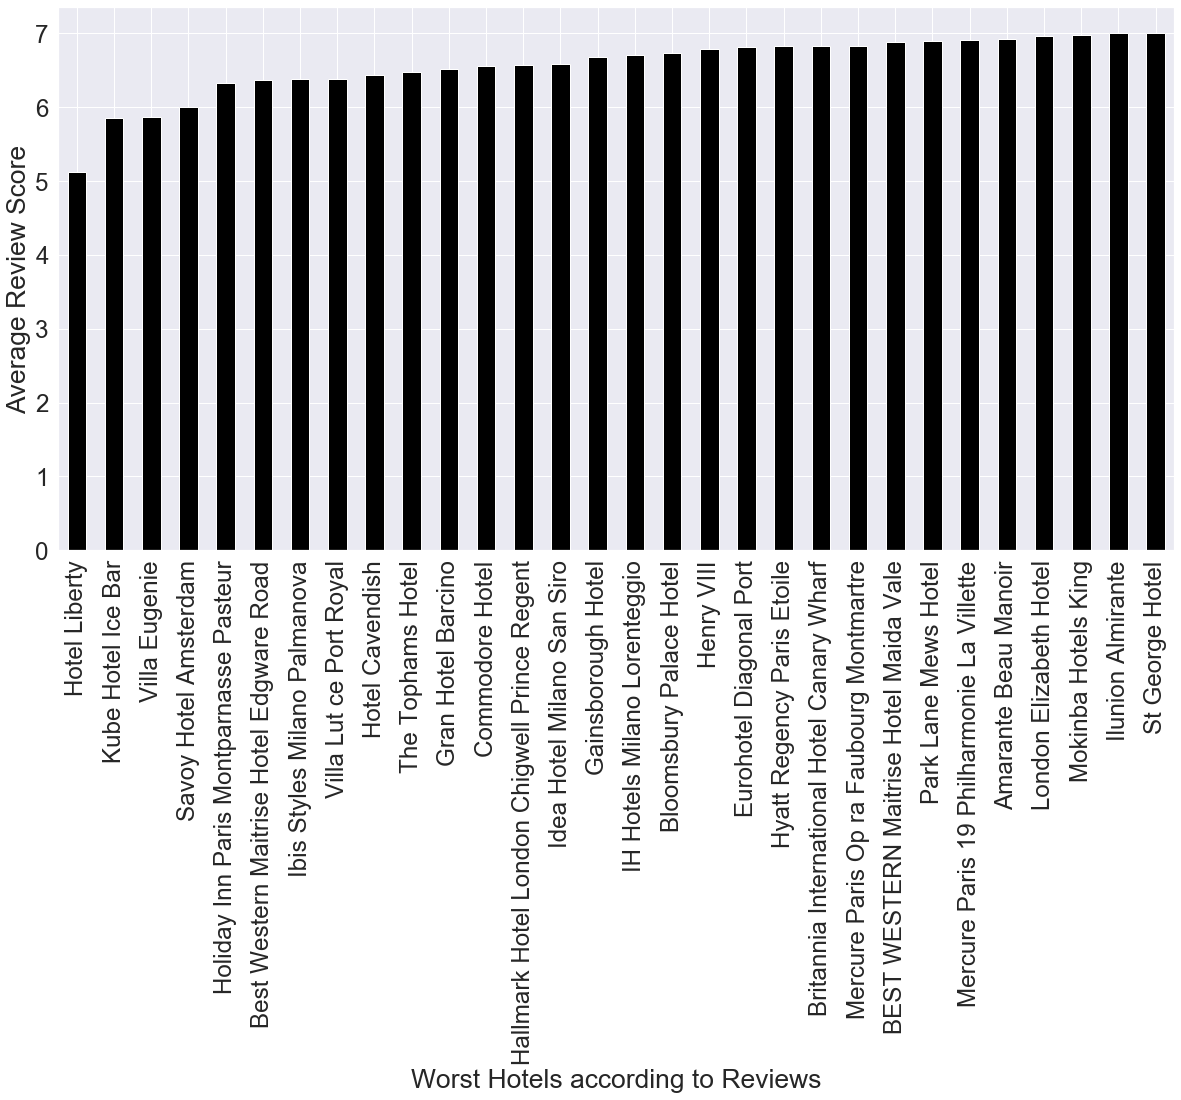

In [93]:
# 30 worst hotels
worst_hotels =data_hotel_reviews.groupby('Hotel_Name')['Reviewer_Score'].mean().sort_values(ascending=True).head(30)
worst_hotels.plot(kind="bar",color="black",figsize=(20,10))
plt.xlabel('Worst Hotels according to Reviews')
plt.ylabel('Average Review Score')
plt.rcParams.update({'font.size': 30})
plt.show()

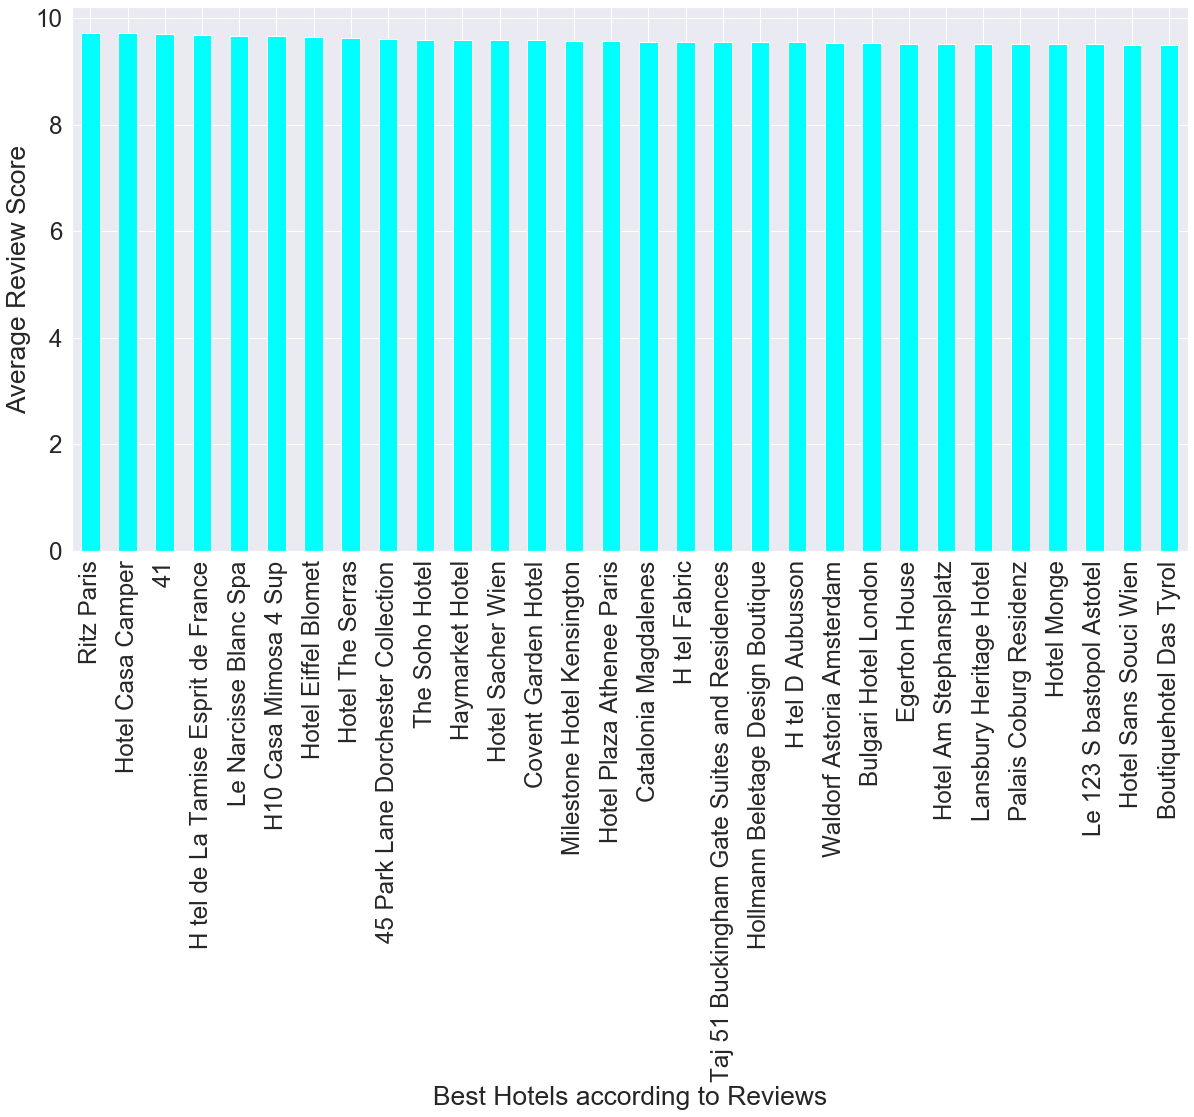

In [95]:
#Top 30 best hotels 
best_hotels = data_hotel_reviews.groupby('Hotel_Name')['Reviewer_Score'].mean().sort_values(ascending=False).head(30)
best_hotels.plot(kind="bar",color = "Cyan",figsize=(20,10))
plt.xlabel('Best Hotels according to Reviews')
plt.ylabel('Average Review Score')
plt.rcParams.update({'font.size': 30})
plt.show()

In [96]:
data_hotel_reviews['Reviewer_Nationality']

0                  Russia 
1                 Ireland 
2               Australia 
3          United Kingdom 
4             New Zealand 
                ...       
515733             Kuwait 
515734            Estonia 
515735              Egypt 
515736             Mexico 
515737            Hungary 
Name: Reviewer_Nationality, Length: 515738, dtype: object

In [97]:
data_hotel_reviews['Leisure'] = data_hotel_reviews['Tags'].map(lambda x: 1 if ' Leisure trip ' in x else 0)
data_hotel_reviews['Business'] = data_hotel_reviews['Tags'].map(lambda x: 2 if ' Business trip ' in x else 0)
data_hotel_reviews['Trip_type'] = data_hotel_reviews['Leisure'] + data_hotel_reviews['Business']

In [98]:
data_hotel_reviews['Trip_type'].value_counts()

1    417778
2     82939
0     15021
Name: Trip_type, dtype: int64

In [99]:
import random
data_hotel_reviews['Trip_type'] = data_hotel_reviews[data_hotel_reviews['Trip_type'] == 0]['Trip_type']

In [101]:
data_hotel_reviews['Trip_type'] = data_hotel_reviews['Trip_type'].fillna(0)

In [121]:

pd.set_option("max_rows", None)
data_hotel_reviews

In [119]:
import random
rand1=random.random()
def trip_type(x):
    if rand1 > 0.2:
        return 1
    else:
        return 2
data_hotel_reviews['Trip_type'] = data_hotel_reviews[data_hotel_reviews['Trip_type'] == 0]['Trip_type'].map(trip_type)
data_hotel_reviews['Trip_type'] = data_hotel_reviews['Trip_type'].fillna(0)
data_hotel_reviews['Trip_type'] = data_hotel_reviews['Trip_type'] + data_hotel_reviews['Business'] + data_hotel_reviews['Leisure']
data_hotel_reviews['Trip_type'].value_counts()

1.0    432799
2.0     82939
Name: Trip_type, dtype: int64

In [155]:
Tags_1=Tags_data.str.split("[",n=1,expand=True)
Tags_Data=copy.Tag_New
Tags=Tags_data.str.split(",", n = 4, expand = True)
Tags

,0,1,2,3,4
0,[' Leisure trip ',' Couple ',' Duplex Double Room ',' Stayed 6 nights '],None
1,[' Leisure trip ',' Couple ',' Duplex Double Room ',' Stayed 4 nights '],None
2,[' Leisure trip ',' Family with young children ',' Duplex Double Room ',' Stayed 3 nights ',' Submitted from a mobile device ']
3,[' Leisure trip ',' Solo traveler ',' Duplex Double Room ',' Stayed 3 nights '],None
4,[' Leisure trip ',' Couple ',' Suite ',' Stayed 2 nights ',' Submitted from a mobile device ']
...,...,...,...,...,...
515733,[' Leisure trip ',' Family with older children ',' 2 rooms ',' Stayed 5 nights '],None
515734,[' Leisure trip ',' Family with young children ',' Standard Triple Room ',' Stayed 2 nights '],None
515735,[' Leisure trip ',' Family with older children ',' 2 rooms ',' Stayed 4 nights ',' Submitted from a mobile device ']
515736,[' Leisure trip ',' Group ',' Standard Triple Room ',' Stayed 3 nights '],None


In [157]:
for i in copy.columns:
    print(i)

Hotel_Address
Additional_Number_of_Scoring
Review_Date
Average_Score
Hotel_Name
Reviewer_Nationality
Negative_Review
Review_Total_Negative_Word_Counts
Total_Number_of_Reviews
Positive_Review
Review_Total_Positive_Word_Counts
Total_Number_of_Reviews_Reviewer_Has_Given
Reviewer_Score
Tags
days_since_review
lat
lng
Tag_New
Trip_Type
Traveller_Type
Room_Type
Duration_of_Stay
Booking_Method


In [156]:
copy['Trip_Type']=Tags[0]
copy['Traveller_Type']=Tags[1]
copy['Room_Type']=Tags[2]
copy['Duration_of_Stay']=Tags[3]
copy['Booking_Method']=Tags[4]

In [ ]:
def traveler_type(x):
if 'Solo traveler' in x:
    return 1
else:
return 0
if 'Couple' in x:
    return 2
else:
return 0
if 'Group' in x:
    return 3
else:
return 0
if 'Family' in x:
    return 4
else:
    return 0
if 'Family with older children' in x:
    return 5
else:
    return 0
if ''
    



In [ ]:
trip=copy.Trip_Type
trip_data=trip.str.split("[",n=1,expand=True)
copy.Trip_Type=trip_data[1]
duration=copy.Duration_of_Stay
duration_data=duration.str.split("]",n=1,expand=True)
copy.Duration_of_Stay=duration_data[0]
method=copy.Booking_Method
booking_method=method.str.split("]",n=1,expand=True)
copy.Booking_Method=booking_method[0]

In [174]:
copy.isna().sum()

Hotel_Address                                      0
Additional_Number_of_Scoring                       0
Review_Date                                        0
Average_Score                                      0
Hotel_Name                                         0
Reviewer_Nationality                               0
Negative_Review                                    0
Review_Total_Negative_Word_Counts                  0
Total_Number_of_Reviews                            0
Positive_Review                                    0
Review_Total_Positive_Word_Counts                  0
Total_Number_of_Reviews_Reviewer_Has_Given         0
Reviewer_Score                                     0
Tags                                               0
days_since_review                                  0
lat                                             3268
lng                                             3268
Tag_New                                            0
Trip_Type                                     